Import des librairies et dataset

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go



df_hist = pd.read_csv("./../data/raw/weatherAUS.csv")
df_villes = pd.read_csv("./../data/raw/villes.csv", sep = ";")

# Ajout des colonnes Etat et Climat
df_meteo = df_hist.merge(df_villes, right_on='Ville', left_on='Location')
df_meteo = df_meteo.drop(columns = 'Ville') 

# Découpage de la date en 3 colonnes
df_meteo['Date'] = pd.to_datetime(df_meteo['Date'], yearfirst = True)
df_meteo["Year"] = df_meteo["Date"].dt.strftime("%Y")
df_meteo["Month"] = df_meteo["Date"].dt.strftime("%m")
df_meteo["Day"] = df_meteo["Date"].dt.strftime("%d")


Distribution de la Précipitation

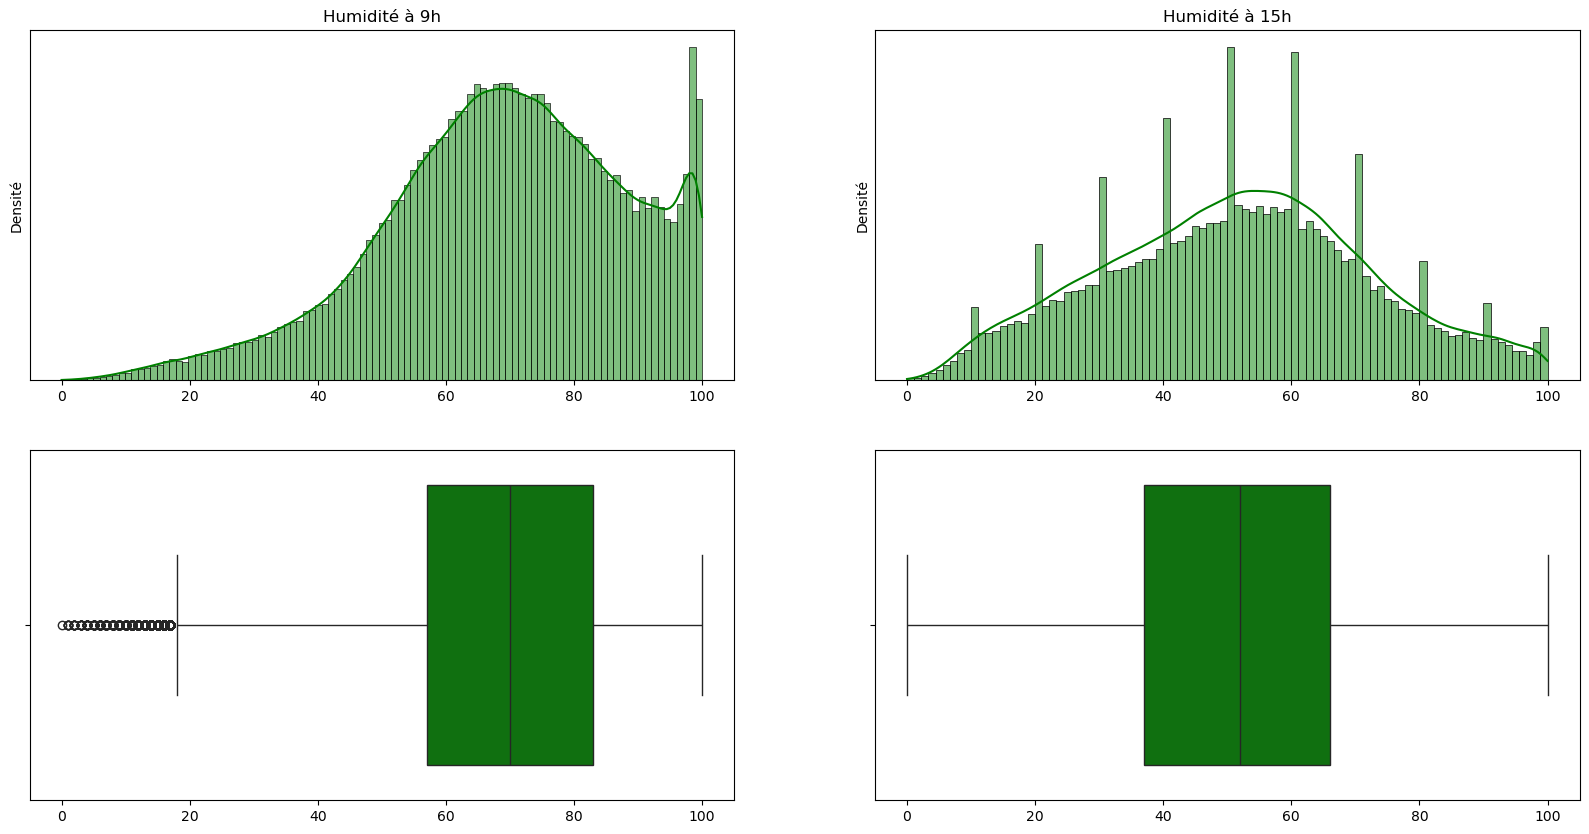

In [5]:
list_col = [ "Humidity9am", "Humidity3pm"]
list_label = [ "Humidité à 9h", "Humidité à 15h"]

fig = plt.figure(figsize = (20, 10))
i=1
for col, label in zip(list_col, list_label) : 
    plt.subplot(2, 2, i)
    i += 1
    sns.histplot(x=df_meteo[col], kde = True, color = 'g')
    plt.title(label)
    plt.yticks([])        
    plt.ylabel("Densité")
    plt.xlabel("")

for col, label in zip(list_col, list_label) : 
    plt.subplot(2, 2, i)
    i += 1
    sns.boxplot(x=df_meteo[col], color = 'g')
    plt.title("")
    plt.ylabel("")
    plt.xlabel("")

plt.show()

Etude des différences de Humidity9am par climat

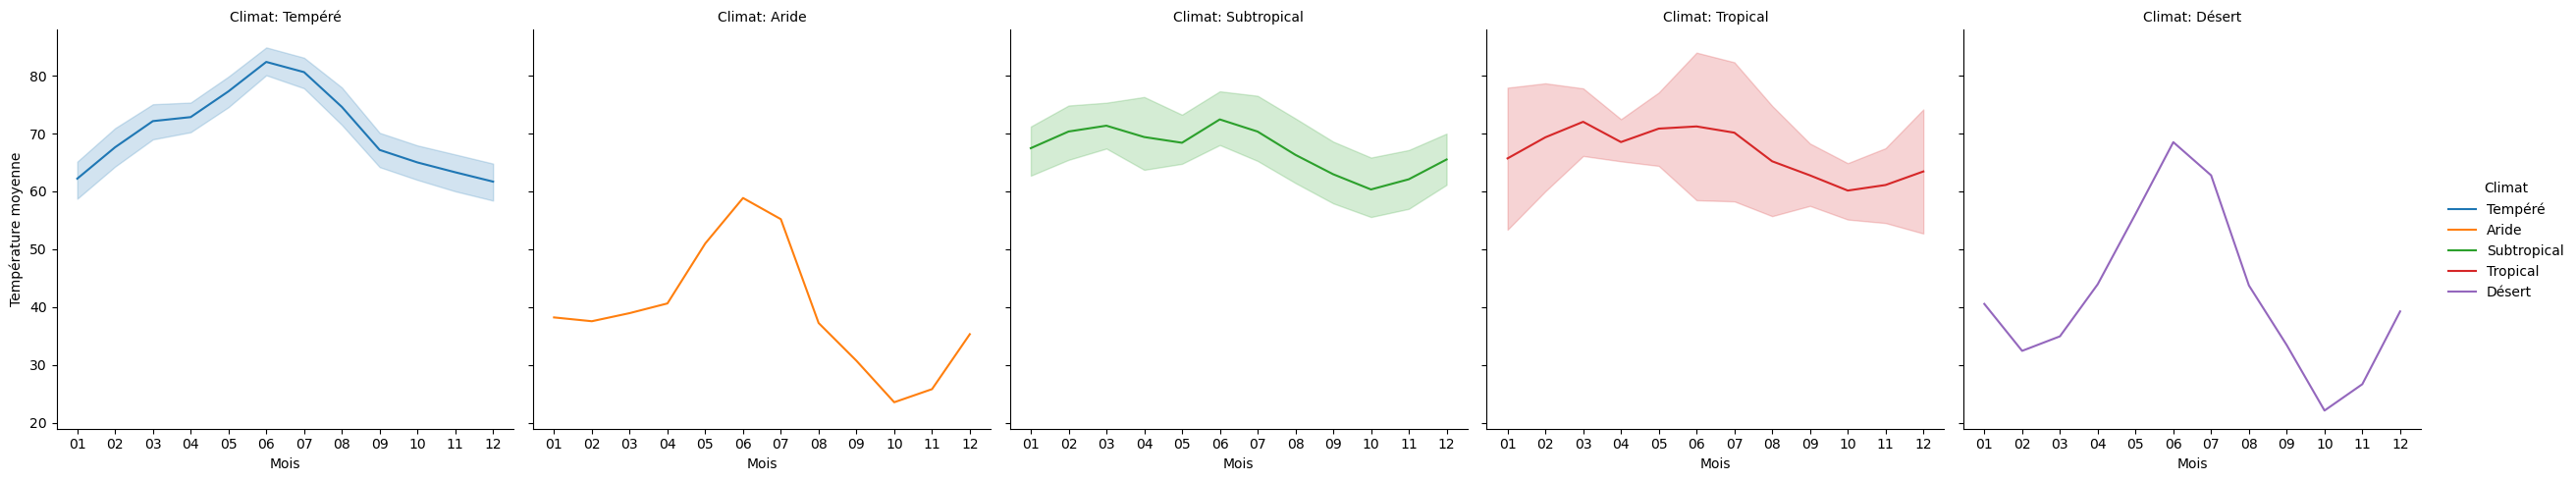

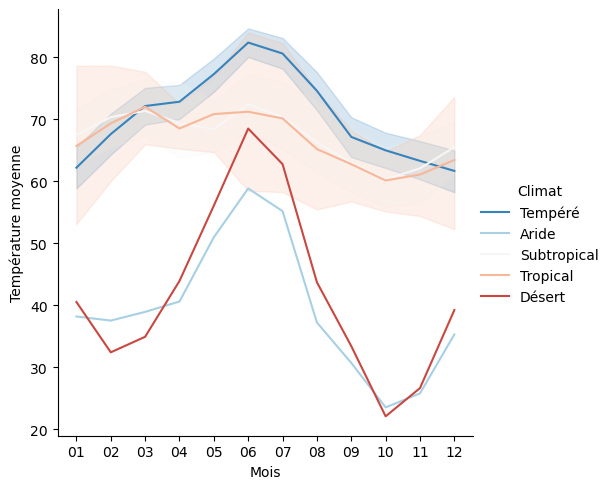

In [6]:

df_tmp = df_meteo[["Location", "Climat", "Year", "Month","Day", "Humidity9am", "Humidity3pm", "Rainfall"]]
df_Temp_climat = df_tmp.groupby(by = [ "Location", "Climat","Month"]).mean("Humidity9am", "Humidity3pm", "Rainfall")

g = sns.relplot(x = "Month",  y = "Humidity9am", col = "Climat", hue = "Climat", kind = "line",  data = df_Temp_climat)
g.set_xlabels("Mois")
g.set_ylabels("Température moyenne")
g.set_axis_labels()
g.set_titles("Climat: {col_name}")

g = sns.relplot(x= "Month", y="Humidity9am", hue="Climat", palette='RdBu_r', kind ='line' , data = df_Temp_climat)
g.set_xlabels("Mois")
g.set_ylabels("Température moyenne")



Etude nb jour de pluie par mois et par climat

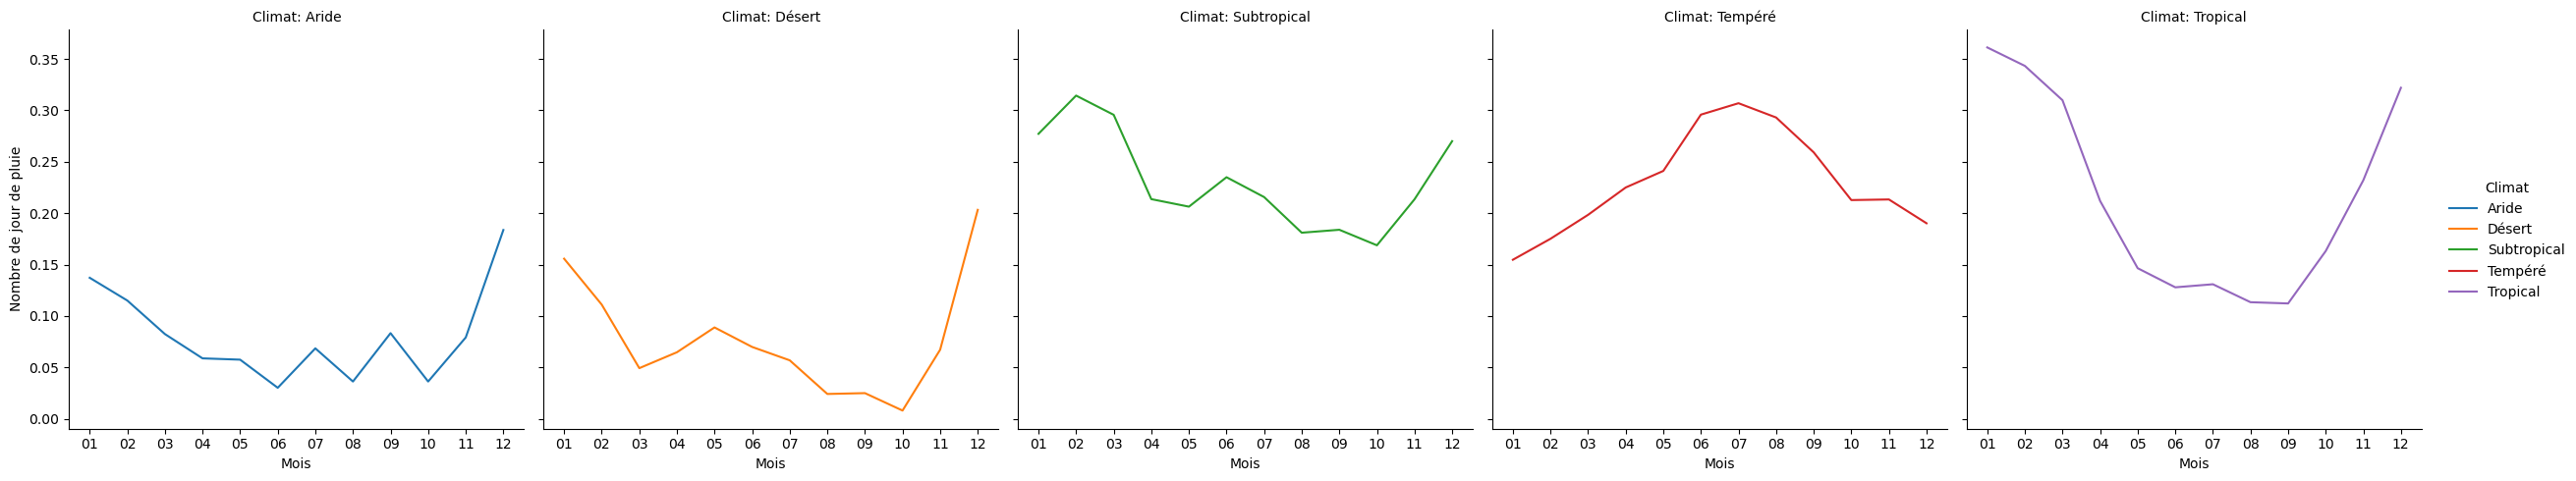

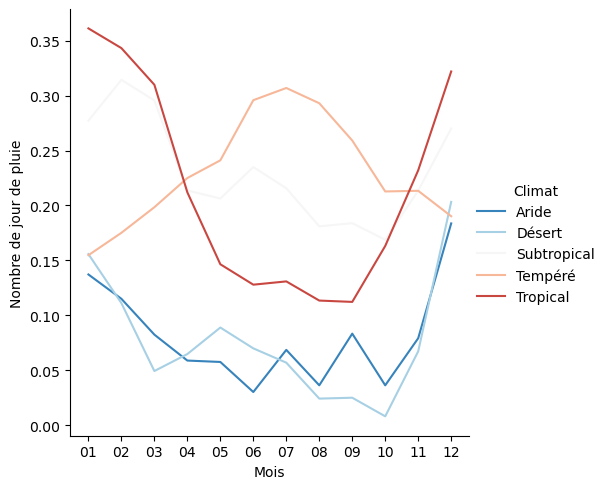

In [14]:
df_meteo["RainToday"].replace({"Yes": 1, "No": 0}, inplace = True)
df_meteo["RainTomorrow"].replace({"Yes": 1, "No": 0}, inplace = True)
df_nbpluie_climat = df_meteo.groupby(by = [ "Climat","Month"]).mean("RainToday")



g = sns.relplot(x = "Month",  y = "RainToday", col = "Climat", hue = "Climat", kind = "line",  data = df_nbpluie_climat)
g.set_xlabels("Mois")
g.set_ylabels("Nombre de jour de pluie")
g.set_axis_labels()
g.set_titles("Climat: {col_name}")

g = sns.relplot(x= "Month", y="RainToday", hue="Climat", palette='RdBu_r', kind ='line' , data = df_nbpluie_climat)
g.set_xlabels("Mois")
g.set_ylabels("Nombre de jour de pluie")


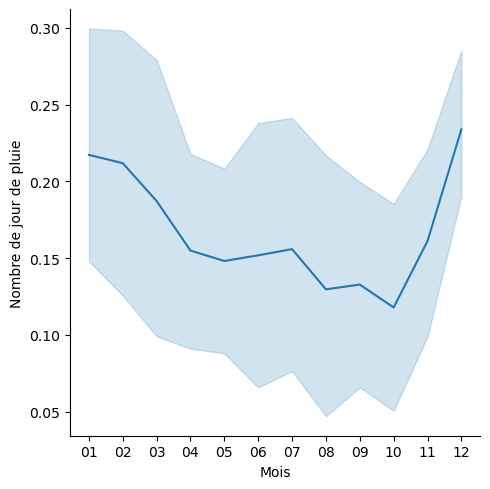

In [15]:
g = sns.relplot(x = "Month",  y = "RainToday", kind = "line",  data = df_nbpluie_climat)
g.set_xlabels("Mois")
g.set_ylabels("Nombre de jour de pluie")
g.set_axis_labels()
g.set_titles("Climat: {col_name}")